In [117]:
!pip install ucimlrepo

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)

# data (as pandas dataframes)
x = ai4i_2020_predictive_maintenance_dataset.data.features
y = ai4i_2020_predictive_maintenance_dataset.data.targets

# metadata
print(ai4i_2020_predictive_maintenance_dataset.metadata)

# variable information
print(ai4i_2020_predictive_maintenance_dataset.variables)

{'uci_id': 601, 'name': 'AI4I 2020 Predictive Maintenance Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/601/data.csv', 'abstract': 'The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression', 'Causal-Discovery'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 10000, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], 'index_col': ['UID', 'Product ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5HS5C', 'creators': [], 'intro_paper': {'title': 'Explainable Artificial Intelligence for Predictive Maintenance

In [119]:
columns = list(x.columns)
print(columns)

['Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']


In [120]:
x.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9


In [121]:
y.head()

,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [122]:
y['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [123]:
print(x.dtypes)

Type                    object
Air temperature        float64
Process temperature    float64
Rotational speed         int64
Torque                 float64
Tool wear                int64
dtype: object


In [124]:
x.isnull().sum()

Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
dtype: int64

In [125]:
for column in columns:
    print(f'{column} => range: {x[column].min()} to {x[column].max()}')

Type => range: H to M
Air temperature => range: 295.3 to 304.5
Process temperature => range: 305.7 to 313.8
Rotational speed => range: 1168 to 2886
Torque => range: 3.8 to 76.6
Tool wear => range: 0 to 253


In [126]:
x = pd.get_dummies(x, columns=['Type'])

In [127]:
x.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,False,False,True
1,298.2,308.7,1408,46.3,3,False,True,False
2,298.1,308.5,1498,49.4,5,False,True,False
3,298.2,308.6,1433,39.5,7,False,True,False
4,298.2,308.7,1408,40.0,9,False,True,False


In [128]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


numeric_features = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']
categorical_features = ['Type_H', 'Type_L', 'Type_M']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

x_train, x_test, y_train, y_test = train_test_split(x, y['Machine failure'])

# model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [129]:
model.score(x_test, y_test)

0.9716

In [130]:
from sklearn.metrics import f1_score

F1 = f1_score(y_test, y_predict)

print(f'F1 Score: {F1}')

F1 Score: 0.2828282828282828


In [132]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[2415    4]
 [  67   14]]


In [134]:
# Check the distribution of the target variable
print("Train Target Distribution:")
print(y_train.value_counts())

print("Test Target Distribution:")
print(y_test.value_counts())


from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))

# Precision and Recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_predict, average='binary')
recall = recall_score(y_test, y_predict, average='binary')

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Train Target Distribution:
Machine failure
0    7242
1     258
Name: count, dtype: int64
Test Target Distribution:
Machine failure
0    2419
1      81
Name: count, dtype: int64
Confusion Matrix:
[[2415    4]
 [  67   14]]
Precision: 0.7777777777777778
Recall: 0.1728395061728395


In [139]:
# Training the model with class weights
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)

# Predictions
y_predict = model.predict(x_test)

# Evaluation
print(f"Accuracy: {model.score(x_test, y_test)}")
print(f"F1 Score: {f1_score(y_test, y_predict)}")

Accuracy: 0.8292
F1 Score: 0.2250453720508167


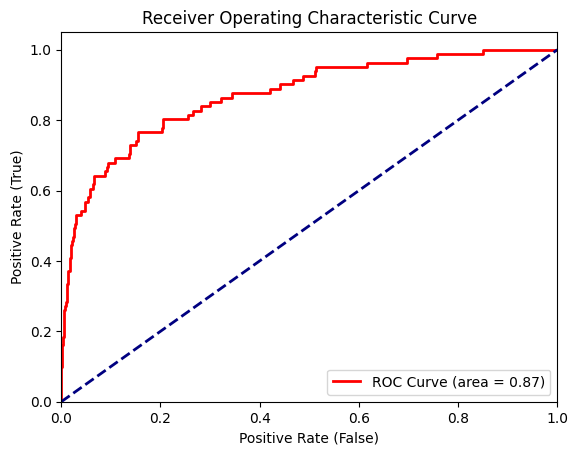

ROC AUC Score: 0.872118363368191


In [146]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_predict_prob = model.predict_proba(x_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_predict_prob)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_predict_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='Red', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Positive Rate (False)')
plt.ylabel('Positive Rate (True)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


print(f"ROC AUC Score: {roc_auc}")